In [1]:
!pip install matplotlib
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('loan.csv',encoding='latin1')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data=data.drop(columns=['Loan_ID'],axis=1)

In [5]:
data


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data=data.dropna()

In [9]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data=data.replace({'Loan_Status':{'N':0,'Y':1}})

C:\Users\mdsng\AppData\Local\Temp\ipykernel_80396\330802101.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace({'Loan_Status':{'N':0,'Y':1}})


In [11]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [13]:
data['Dependents']=data['Dependents'].astype(str).str.replace('3+','4',regex=0).astype('float32')

In [14]:
data['Dependents'].value_counts()

Dependents
0.0    274
2.0     85
1.0     80
4.0     41
Name: count, dtype: int64

In [15]:
data['LoanAmount'].value_counts()

LoanAmount
120.0    13
110.0    13
100.0    13
187.0    12
128.0     9
         ..
36.0      1
146.0     1
142.0     1
496.0     1
253.0     1
Name: count, Length: 186, dtype: int64

In [16]:
data['LoanAmount']=data['LoanAmount'].fillna(0).astype('float32')


In [17]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,4.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


<Axes: xlabel='Education', ylabel='count'>

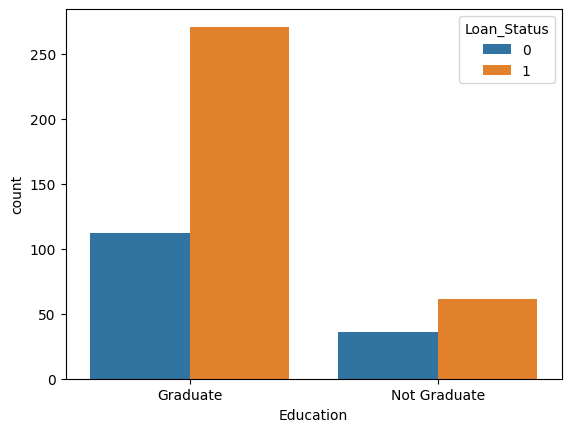

In [18]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='Dependents', ylabel='count'>

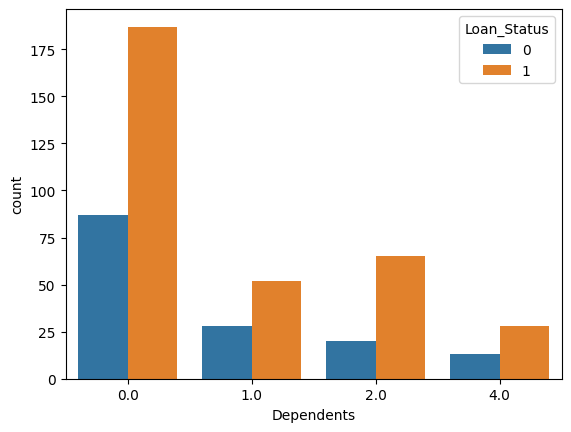

In [19]:
sns.countplot(x='Dependents',hue='Loan_Status',data=data)

<Axes: xlabel='Married', ylabel='count'>

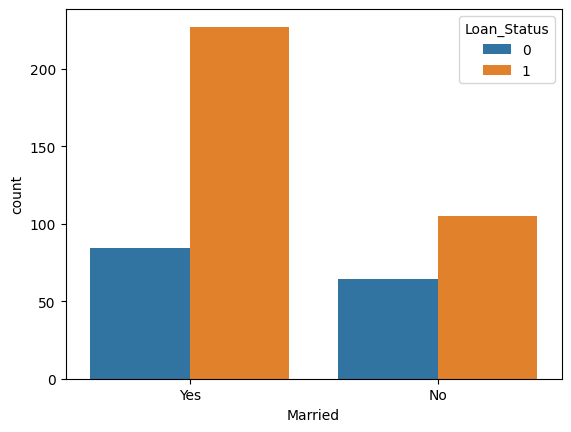

In [20]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

<Axes: xlabel='Property_Area', ylabel='count'>

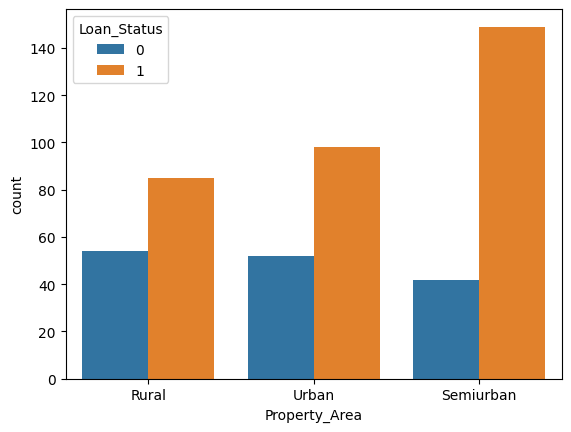

In [21]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)

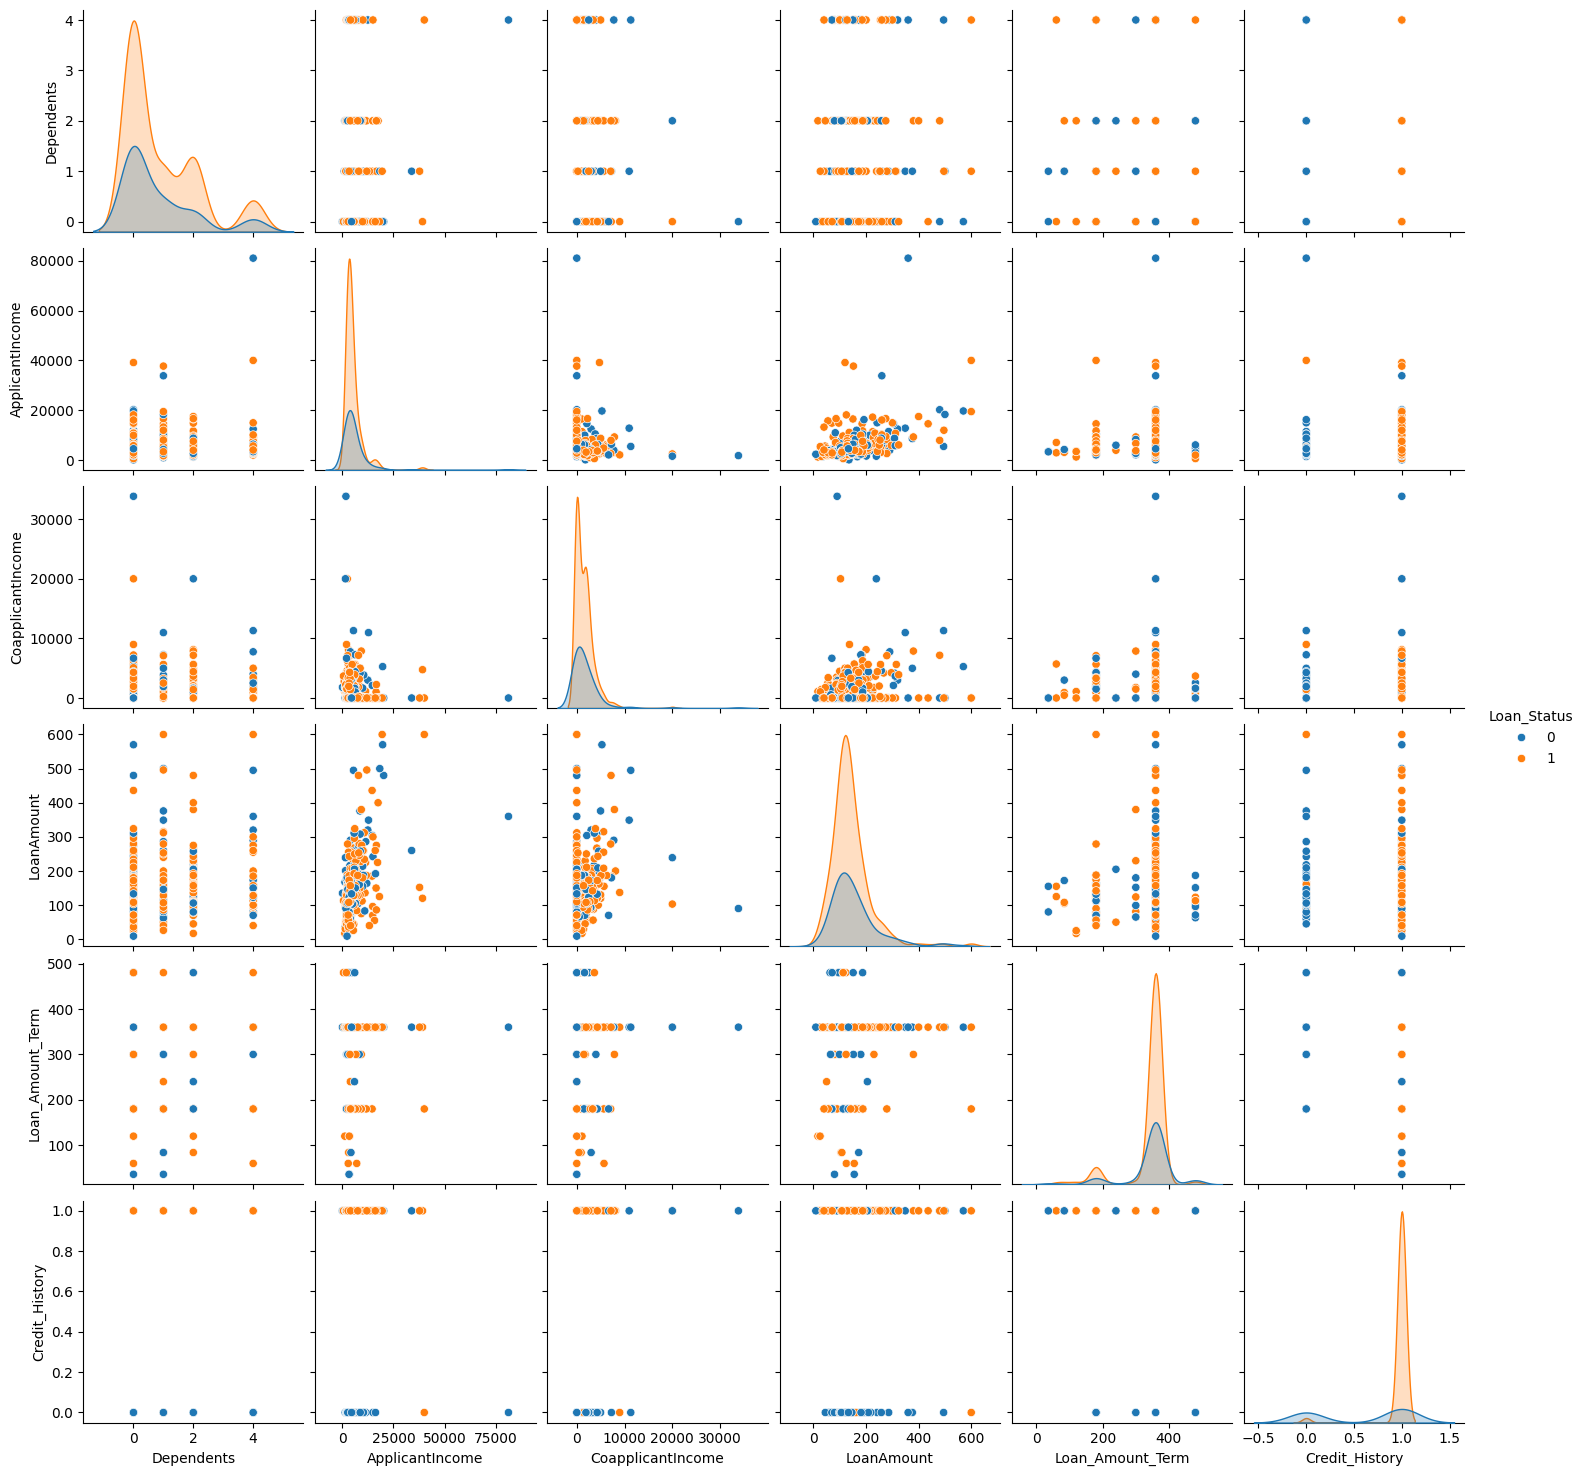

In [22]:
sns.pairplot(data,hue='Loan_Status')


In [23]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [24]:
data=data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Education':{'Graduate':1,'Not Graduate':0},
                   'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}})

C:\Users\mdsng\AppData\Local\Temp\ipykernel_80396\2343294318.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Education':{'Graduate':1,'Not Graduate':0},


In [25]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2.0,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4.0,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [26]:
x=data.drop(columns='Loan_Status',axis=1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2.0,1,1,5417,4196.0,267.0,360.0,1.0,1


In [27]:
y=data['Loan_Status']
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [29]:
from sklearn.svm import SVC

In [30]:
model=SVC(kernel='linear')

In [31]:
pred=model.fit(x_train,y_train)

In [32]:
predict=pred.predict(x_test)

In [33]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1])

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(predict,y_test)

0.8125

In [36]:
import pickle

In [41]:
with open("loan.pickle",'wb') as file:
    pickle.dump(predict,file)